## NBA api for data visualizations

In [1]:
pip install pandas nba_api

     ---------------------------------------- 0.0/257.3 kB ? eta -:--:--
     ------------------------- ------------ 174.1/257.3 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 257.3/257.3 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from nba_api.stats.endpoints import leagueleaders
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
import pandas as pd
from nba_api.stats.endpoints import leagueleaders

# Pull data for the top 500 scorers by PTS column
top_500 = leagueleaders.LeagueLeaders(
    season='2020-21',
    stat_category_abbreviation='PTS'
).get_data_frames()[0][:500]

# Group players by name and player ID and calculate average stats
top_500_avg = top_500.groupby(['PLAYER', 'PLAYER_ID']).mean()[[
    'MIN', 'FGM', 'FGA', 'FTM', 'FTA', 'PTS', 'FG3M', 'FG3A', 'GP'
]]

# Save the dataframe to a local CSV file
top_500_avg.to_csv('top_500_avg.csv')


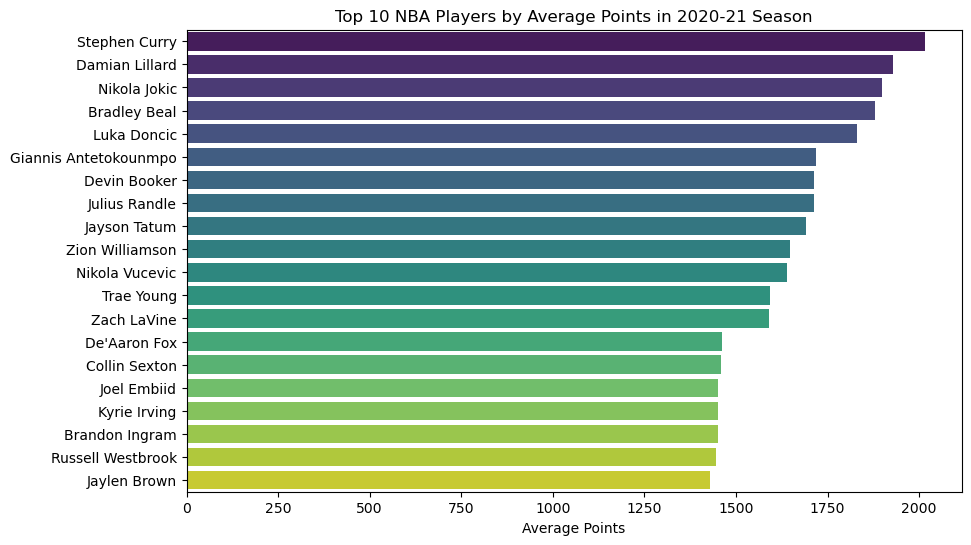

In [5]:
# Load the data from the CSV file
data = pd.read_csv('top_500_avg.csv')

# Sort the data by 'PTS' column and get the top 10
top_10_players = data.sort_values(by='PTS', ascending=False).head(20)

# Create a bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x='PTS', y='PLAYER', data=top_10_players, palette='viridis')

# Add labels and title
plt.xlabel('Average Points', )
plt.ylabel('')
plt.title('Top 10 NBA Players by Average Points in 2020-21 Season')

# Show the plot
plt.show()


In [8]:
from nba_api.stats.endpoints import playercareerstats

# Get career stats for Michael Jordan (player_id = 893)
career = playercareerstats.PlayerCareerStats(player_id='893')

# Get the data as a pandas DataFrame
df = career.get_data_frames()[0]

# Print the DataFrame
print(df)


    PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  \
0         893   1984-85        00  1610612741               CHI        22.0   
1         893   1985-86        00  1610612741               CHI        23.0   
2         893   1986-87        00  1610612741               CHI        24.0   
3         893   1987-88        00  1610612741               CHI        25.0   
4         893   1988-89        00  1610612741               CHI        26.0   
5         893   1989-90        00  1610612741               CHI        27.0   
6         893   1990-91        00  1610612741               CHI        28.0   
7         893   1991-92        00  1610612741               CHI        29.0   
8         893   1992-93        00  1610612741               CHI        30.0   
9         893   1994-95        00  1610612741               CHI        32.0   
10        893   1995-96        00  1610612741               CHI        33.0   
11        893   1996-97        00  1610612741       

In [9]:
from nba_api.stats.endpoints import playercareerstats, commonallplayers

# Get player IDs
players = ['Michael Jordan', 'LeBron James', 'Kobe Bryant', 'Shaquille O\'Neal', 'Stephen Curry', 'Giannis Antetokounmpo']
player_ids = {}
all_players = commonallplayers.CommonAllPlayers().get_data_frames()[0]

for player in players:
    player_ids[player] = all_players[all_players['DISPLAY_FIRST_LAST'] == player]['PERSON_ID'].values[0]

# Get career stats
career_stats = {}

for player, id in player_ids.items():
    stats = playercareerstats.PlayerCareerStats(player_id=id).get_data_frames()[0]
    career_stats[player] = stats

# Now, career_stats is a dictionary where the key is the player's name and the value is a DataFrame of their career stats


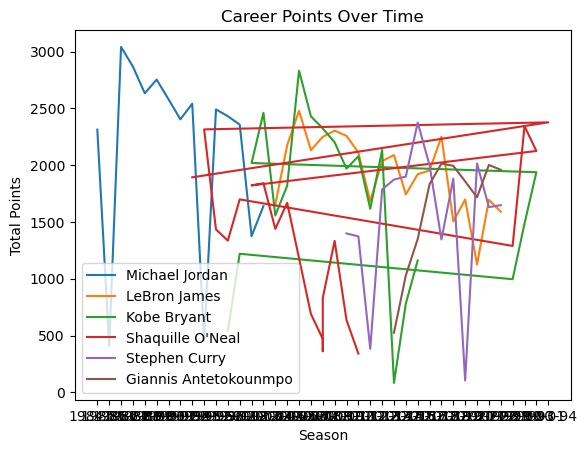

In [10]:
import matplotlib.pyplot as plt

for player, stats in career_stats.items():
    plt.plot(stats['SEASON_ID'], stats['PTS'], label=player)

plt.xlabel('Season')
plt.ylabel('Total Points')
plt.title('Career Points Over Time')
plt.legend()
plt.show()


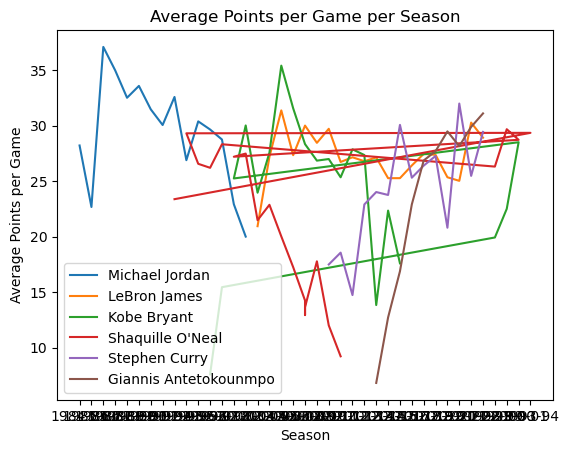

In [11]:
import matplotlib.pyplot as plt

# Plot average points per game per season
for player, stats in career_stats.items():
    # Calculate average points per game
    stats['AVG_PTS'] = stats['PTS'] / stats['GP']
    plt.plot(stats['SEASON_ID'], stats['AVG_PTS'], label=player)

plt.xlabel('Season')
plt.ylabel('Average Points per Game')
plt.title('Average Points per Game per Season')
plt.legend()
plt.show()


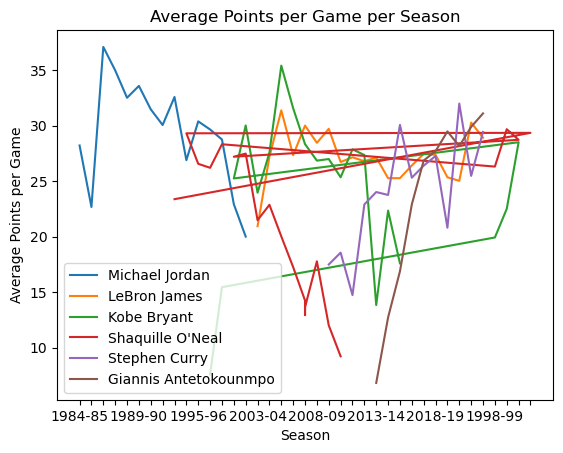

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Plot average points per game per season
fig, ax = plt.subplots()

for player, stats in career_stats.items():
    # Calculate average points per game
    stats['AVG_PTS'] = stats['PTS'] / stats['GP']
    ax.plot(stats['SEASON_ID'], stats['AVG_PTS'], label=player)

# Only include every nth x-axis label to prevent overcrowding
n = 5  # Show every 5th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel('Season')
ax.set_ylabel('Average Points per Game')
ax.set_title('Average Points per Game per Season')
ax.legend()

plt.show()


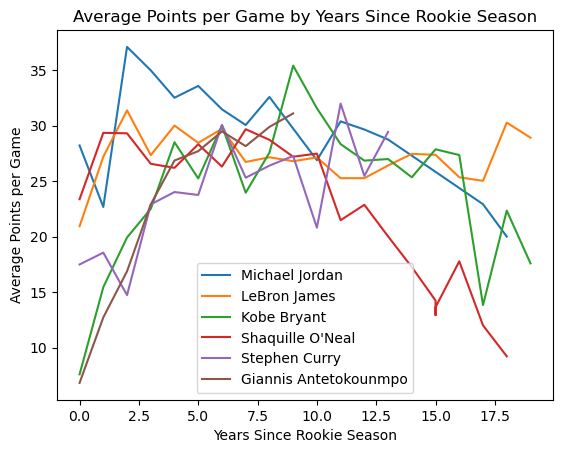

In [13]:
import matplotlib.pyplot as plt

# Plot average points per game per season
fig, ax = plt.subplots()

for player, stats in career_stats.items():
    # Calculate average points per game
    stats['AVG_PTS'] = stats['PTS'] / stats['GP']
    # Create a new column for years since rookie season
    stats['YEARS_SINCE_ROOKIE'] = stats['SEASON_ID'].apply(lambda x: int(x.split('-')[0]) - int(stats['SEASON_ID'].iloc[0].split('-')[0]))
    ax.plot(stats['YEARS_SINCE_ROOKIE'], stats['AVG_PTS'], label=player)

ax.set_xlabel('Years Since Rookie Season')
ax.set_ylabel('Average Points per Game')
ax.set_title('Average Points per Game by Years Since Rookie Season')
ax.legend()

plt.show()


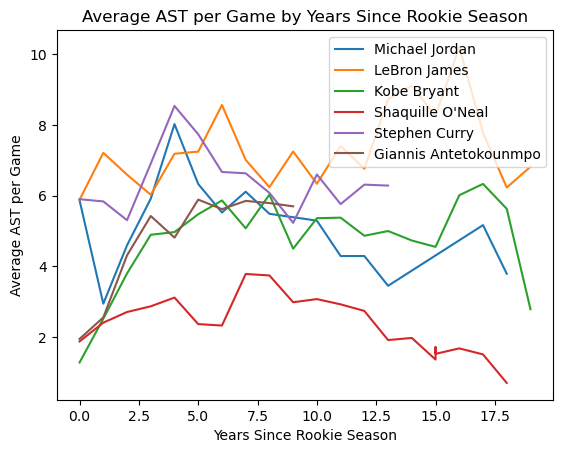

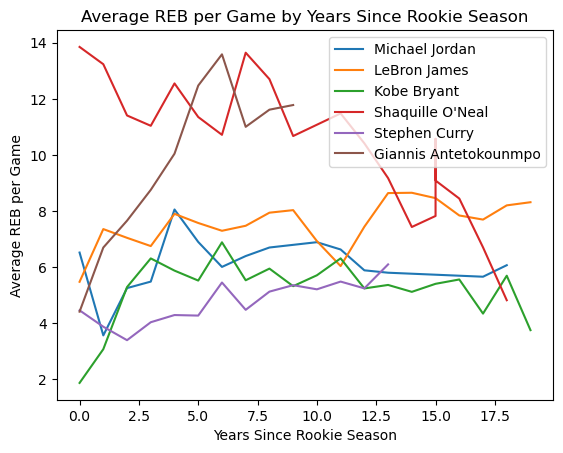

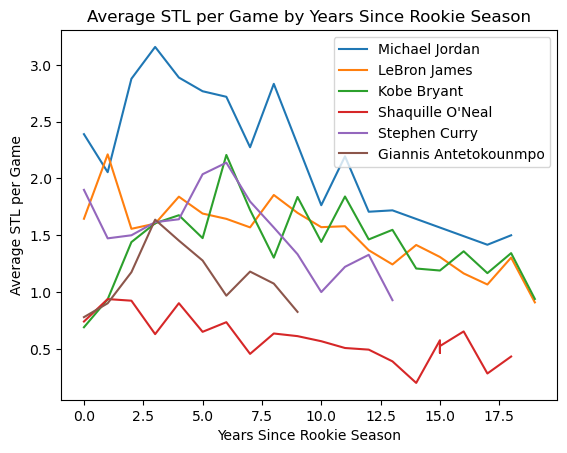

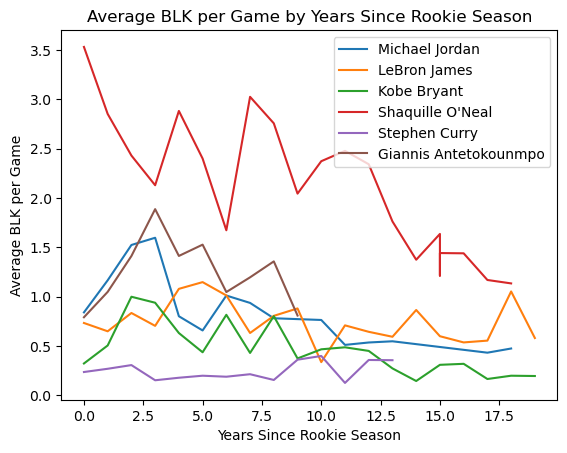

In [14]:
import matplotlib.pyplot as plt

# Define the statistics to plot
stats_to_plot = ['AST', 'REB', 'STL', 'BLK']

for stat in stats_to_plot:
    # Create a new figure for each stat
    fig, ax = plt.subplots()

    for player, stats in career_stats.items():
        # Calculate average stat per game
        stats['AVG_' + stat] = stats[stat] / stats['GP']
        ax.plot(stats['YEARS_SINCE_ROOKIE'], stats['AVG_' + stat], label=player)

    ax.set_xlabel('Years Since Rookie Season')
    ax.set_ylabel('Average ' + stat + ' per Game')
    ax.set_title('Average ' + stat + ' per Game by Years Since Rookie Season')
    ax.legend()

plt.show()


In [30]:
from nba_api.stats.endpoints import leaguedashplayerstats, leaguedashplayerbiostats

# Get player stats for the current season
player_stats = leaguedashplayerstats.LeagueDashPlayerStats(season='2022-23')

# Get player bio stats for the current season
player_bio_stats = leaguedashplayerbiostats.LeagueDashPlayerBioStats(season='2022-23')

# Convert the data to dataframes
player_stats_df = player_stats.get_data_frames()[0]
player_bio_stats_df = player_bio_stats.get_data_frames()[0]

# Merge the dataframes on the player ID
merged_df = pd.merge(player_stats_df, player_bio_stats_df, on='PLAYER_ID')

# Sort the dataframe by points per game and take the top 100 players
top_100_players = merged_df.sort_values('PTS_y', ascending=False).head(100)



In [31]:
print(merged_df.columns)


Index(['PLAYER_ID', 'PLAYER_NAME_x', 'NICKNAME', 'TEAM_ID_x',
       'TEAM_ABBREVIATION_x', 'AGE_x', 'GP_x', 'W', 'L', 'W_PCT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB_x', 'AST_x', 'TOV', 'STL', 'BLK', 'BLKA', 'PF',
       'PFD', 'PTS_x', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3',
       'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK',
       'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK',
       'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK',
       'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK',
       'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK',
       'WNBA_FANTASY_PTS_RANK', 'PLAYER_NAME_y', 'TEAM_ID_y',
       'TEAM_ABBREVIATION_y', 'AGE_y', 'PLAYER_HEIGHT', 'PLAYER_HEIGHT_INCHES',
       'PLAYER_WEIGHT', 'COLLEGE', 'COUNTRY', 'DRAFT_YE

In [32]:
# Sort the dataframe by points per game and take the top 100 players
top_100_players = merged_df.sort_values('PTS_y', ascending=False).head(100)


In [33]:
print(top_100_players.head())


     PLAYER_ID            PLAYER_NAME_x NICKNAME   TEAM_ID_x  \
238    1628369             Jayson Tatum   Jayson  1610612738   
252     203954              Joel Embiid     Joel  1610612755   
341    1629029              Luka Doncic     Luka  1610612742   
463    1628983  Shai Gilgeous-Alexander     Shai  1610612760   
166     203507    Giannis Antetokounmpo  Giannis  1610612749   

    TEAM_ABBREVIATION_x  AGE_x  GP_x   W   L  W_PCT  ...  GP_y  PTS_y  REB_y  \
238                 BOS   25.0    74  52  22  0.703  ...    74   2225    649   
252                 PHI   29.0    66  43  23  0.652  ...    66   2183    670   
341                 DAL   24.0    66  33  33  0.500  ...    66   2138    569   
463                 OKC   24.0    68  33  35  0.485  ...    68   2135    329   
166                 MIL   28.0    63  47  16  0.746  ...    63   1959    742   

     AST_y  NET_RATING  OREB_PCT  DREB_PCT  USG_PCT  TS_PCT  AST_PCT  
238    342         8.5     0.029     0.200    0.319   0.607    

In [34]:
print(top_100_players[['PTS_y', 'AST_y', 'REB_y', 'STL', 'BLK']].head())


     PTS_y  AST_y  REB_y  STL  BLK
238   2225    342    649   78   51
252   2183    274    670   66  112
341   2138    529    569   90   33
463   2135    371    329  112   65
166   1959    359    742   52   51


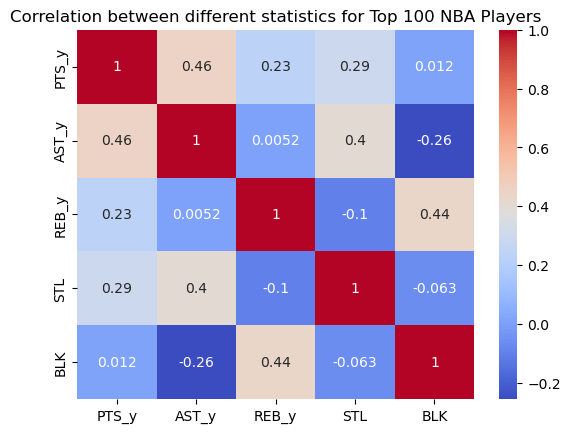

In [35]:
# Calculate correlation matrix
corr = top_100_players[['PTS_y', 'AST_y', 'REB_y', 'STL', 'BLK']].corr()

# Create a heatmap
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between different statistics for Top 100 NBA Players')
plt.show()


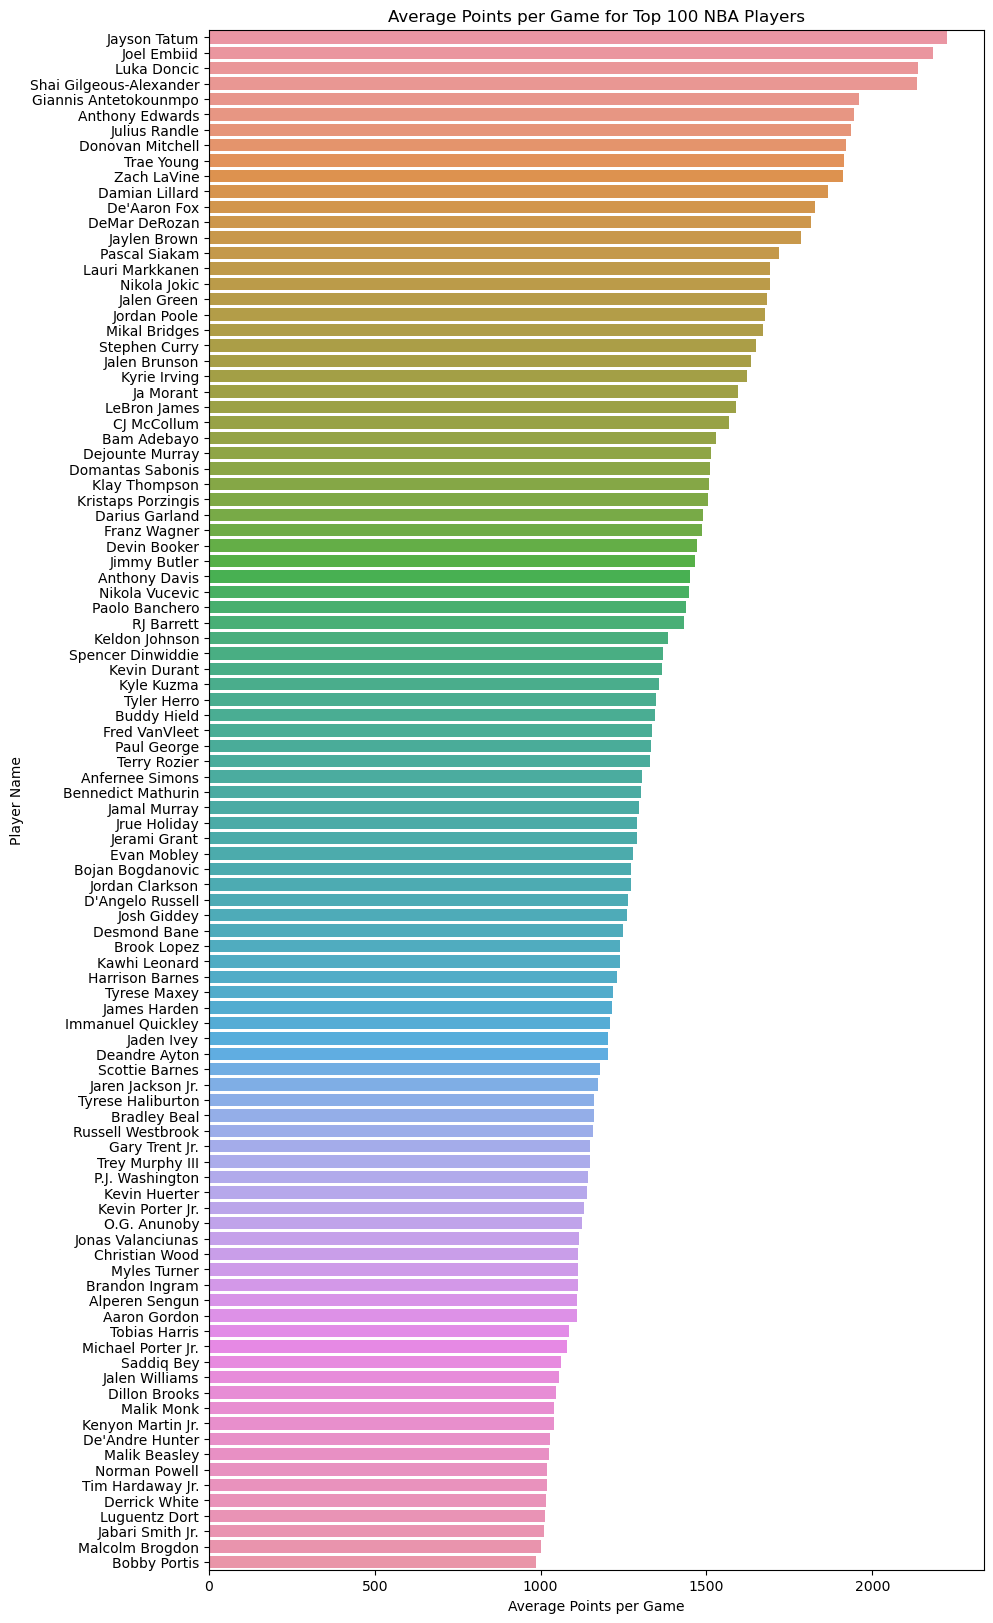

In [36]:
# Sort players by average points per game
sorted_players = top_100_players.sort_values('PTS_y', ascending=False)

# Create a bar chart
plt.figure(figsize=(10,20))
sns.barplot(x='PTS_y', y='PLAYER_NAME_x', data=sorted_players)
plt.title('Average Points per Game for Top 100 NBA Players')
plt.xlabel('Average Points per Game')
plt.ylabel('Player Name')
plt.show()


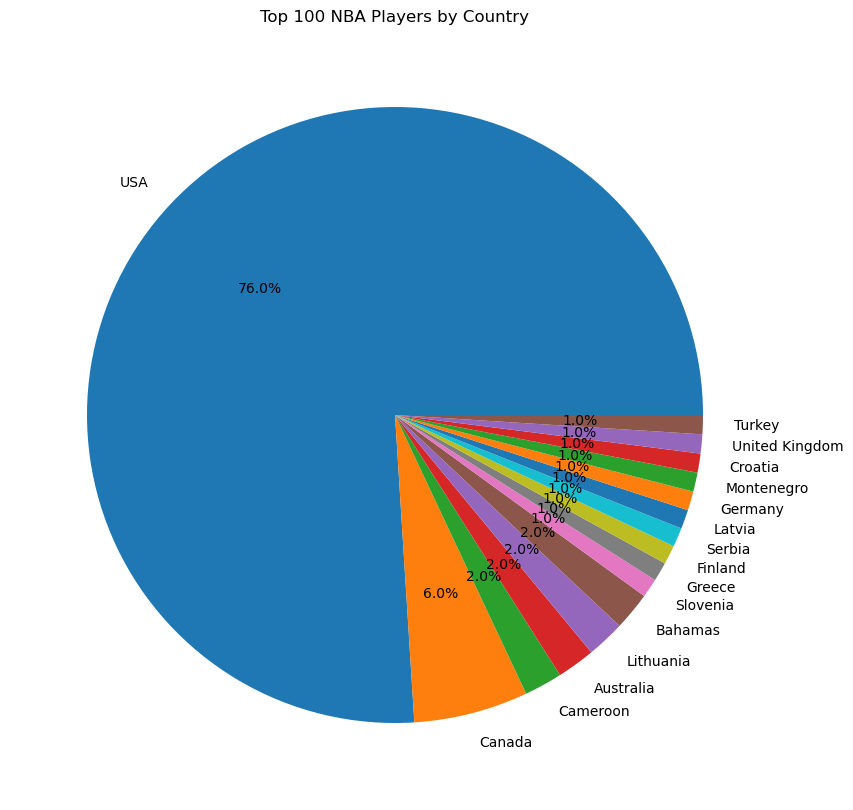

In [37]:
# Count players by country
country_counts = top_100_players['COUNTRY'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,10))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Top 100 NBA Players by Country')
plt.show()


In [39]:
from nba_api.stats.endpoints import playercareerstats

# Nikola Jokić
career = playercareerstats.PlayerCareerStats(player_id='203999') 

# pandas data frames (optional: pip install pandas)
career_df = career.get_data_frames()[0]

# json
career_json = career.get_json()

# dictionary
career_dict = career.get_dict()


In [41]:
from nba_api.stats.endpoints import playercareerstats
import pandas as pd

# Get the career stats for the player
career = playercareerstats.PlayerCareerStats(player_id='203999')

# Convert the data to a dataframe
career_df = career.get_data_frames()[0]

# Sort the dataframe by season
career_df = career_df.sort_values('SEASON_ID')

# Calculate the year-over-year growth
career_df['PTS_growth'] = career_df['PTS'].pct_change()


In [48]:
print(df.columns)


Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [47]:
import numpy as np

# Top 40 players based on points
top_40_pts = df.nlargest(40, 'PTS')

# Randomly select a player from the top 40
random_player = np.random.choice(top_40_pts['PLAYER_NAME'])

# Bar plot for points for the randomly selected player
plt.figure(figsize=(15, 7))
sns.barplot(x='PLAYER_NAME', y='PTS', data=df[df['PLAYER_NAME'] == random_player])
plt.title(f'Points for {random_player}')
plt.xlabel('Player')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.show()

# Similarly you can create for Assists and Rebounds

# Randomly select a player from the top 40
random_player = np.random.choice(top_40_pts['PLAYER_NAME'])

# Bar plot for assists for the randomly selected player
plt.figure(figsize=(15, 7))
sns.barplot(x='PLAYER_NAME', y='AST', data=df[df['PLAYER_NAME'] == random_player])
plt.title(f'Assists for {random_player}')
plt.xlabel('Player')
plt.ylabel('Assists')
plt.xticks(rotation=90)
plt.show()

# Randomly select a player from the top 40
random_player = np.random.choice(top_40_pts['PLAYER_NAME'])

# Bar plot for rebounds for the randomly selected player
plt.figure(figsize=(15, 7))
sns.barplot(x='PLAYER_NAME', y='REB', data=df[df['PLAYER_NAME'] == random_player])
plt.title(f'Rebounds for {random_player}')
plt.xlabel('Player')
plt.ylabel('Rebounds')
plt.xticks(rotation=90)
plt.show()a


KeyError: 'PLAYER_NAME'

In [43]:
# Bar plot for points
plt.figure(figsize=(15, 7))
sns.barplot(x='PLAYER_NAME', y='PTS_y', data=top_10_pts)
plt.title('Top 10 NBA Players based on Points')
plt.xlabel('Player')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.show()


ValueError: Could not interpret input 'PLAYER_NAME'

<Figure size 1500x700 with 0 Axes>

In [44]:
print(top_10_pts.columns)


Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [45]:
print(top_10_pts.head())


   PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  \
2        893   1986-87        00  1610612741               CHI        24.0   
3        893   1987-88        00  1610612741               CHI        25.0   
5        893   1989-90        00  1610612741               CHI        27.0   
4        893   1988-89        00  1610612741               CHI        26.0   
6        893   1990-91        00  1610612741               CHI        28.0   

   GP  GS     MIN   FGM  ...  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV  \
2  82  82  3281.0  1098  ...   0.857   166   264  430  377  236  125  272   
3  82  82  3311.0  1069  ...   0.841   139   310  449  485  259  131  252   
5  82  82  3197.0  1034  ...   0.848   143   422  565  519  227   54  247   
4  81  81  3255.0   966  ...   0.850   149   503  652  650  234   65  290   
6  82  82  3034.0   990  ...   0.851   118   374  492  453  223   83  202   

    PF   PTS  
2  237  3041  
3  270  2868  
5  241  2753  
4  247  